## **Tests Estadísticos**

### **Del proyecto:** 231028-1_tests_estadisticos_python

### Procedimientos:
1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab
2. Cargar el dataset en un DataFrame
3. Consultar información sobre las variables del Dataframe
4. Consultar medidas de tendencia central y medidas de distribución de una variable del dataset
5. Tratamiento de datos extremos y datos atípicos
6. Visualizando la distribución acumulada

### 1. **Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab**

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


¿Cómo pasar la ruta del archivo dataset cuando hay espacios en blanco en nombres de la ruta?
Respuesta: Convertir a una cadena de caracteres encerrando entre comillas simples o dobles toda la ruta incluyendo el nombre del archivo

In [ ]:
pip install -r "/content/drive/MyDrive/Colab Notebooks/231028-1_tests_estadisticos_python/requirements.txt"

In [19]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans

# **ImportError: The plotly.plotly module is deprecated, Solution : use the chart_studio.plotly module instead. **
import chart_studio.plotly as py
import plotly.graph_objs as go

# Runtime error: chart is displayed blank.
# When using Google Colab use the overall import statements below, this will set the rendering to Colab style and the plots will be displayed.
import plotly.offline as pyoff
#initiate visualization library for jupyter notebook
pyoff.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [20]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

### 2. **Cargar el dataset en un dataframe**

In [21]:
# ¿Cual es la manera recomendada para fijar la ruta de un archivo dataset para cargarlo en Google Colab?
# Respuesta: Asignar la ruta a un string y pasarlo como parametro al método pd.read_csv()
tmdb_5000_movies_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231028-1_tests_estadisticos_python/Dataset/tmdb_5000_movies.csv'
tmdb_df = pd.read_csv(tmdb_5000_movies_data_file_path)

### 3. **Consultar información sobre las variables del Dataframe**

In [40]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### 4. **Consultar medidas de tendencia central y medidas de distribución de una variable del dataset**

Text(0.5, 1.0, 'Gráfico de distribución')

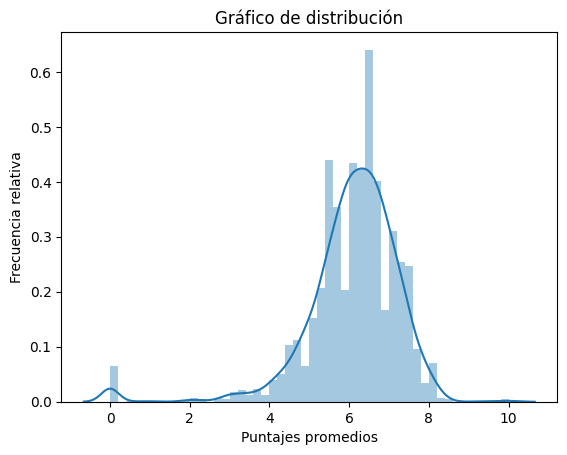

In [23]:
# Por defecto al trazar un histograma de una variable se muestra las medidas normalizadas (frecuencia relativa)
# para mostrar las medidas absolutas se requiere desactivar algunos parametros del método sns.displot()
ax = sns.distplot(tmdb_df.vote_average)
ax.set(xlabel = "Puntajes promedios", ylabel = "Frecuencia relativa")
ax.set_title("Gráfico de distribución")

Text(0.5, 1.0, 'Gráfico de distribución de puntajes promedios')

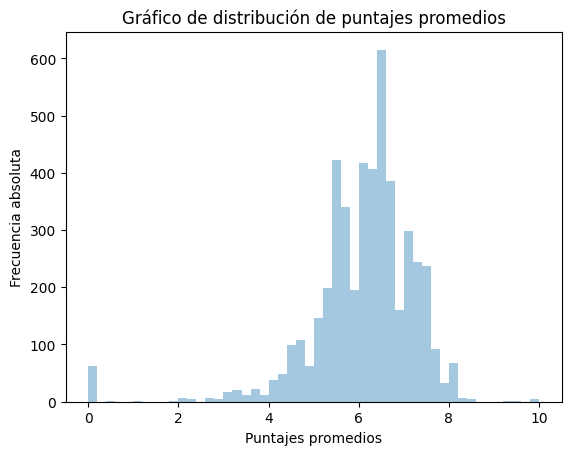

In [24]:
# Personalizando el histograma para mostrar las frecuencias absolutas de la variable vote_average y eliminar la linea kde
ax = sns.distplot( tmdb_df.vote_average,
              kde = False,
              norm_hist= False
             )
ax.set(xlabel = "Puntajes promedios", ylabel = "Frecuencia absoluta")
ax.set_title("Gráfico de distribución de puntajes promedios")

<Axes: xlabel='vote_average'>

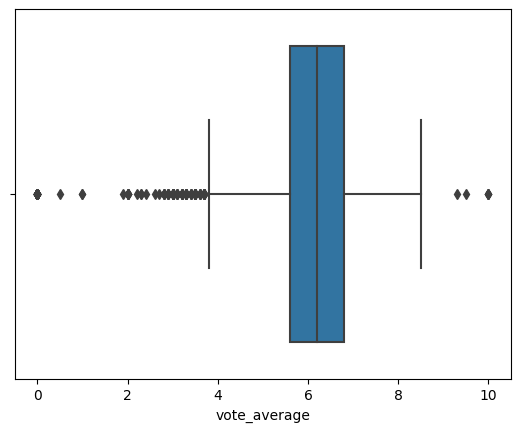

In [25]:
# ¿Como consultar las medidas de tendencia central y medidas de distribución?
# Respuesta: Trazando un diagrama de caja (sns.boxplot())
sns.boxplot(x=tmdb_df.vote_average)

El diagrama de caja muestra que hay usuarios que votaron 0 y otros votaron 10 que según se interpreten pueden ser valores extremos o valores atípicos (outliers)

In [26]:
# ¿Cómo interpretar correctamente los valores extremos o los valores atípicos?
# Respuesta: aplicando un filtro a cada valor para consultar los registros completos a los que pertenecen
# Ejemplo:
tmdb_df.query("vote_average == 0")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


**Conclusiones**: Notamos que existen 63 registros (observaciones) que "votaron 0" y que la cantidad de votos es nulo en cada registro lo cual indica un error de entrada de datos, si aplicamos el mismo procedimiento de consulta al caso de los que votaron 10 y notamos que son sólo 4 registros, estos casos aúnque representan una fracción del total están afectando las medidas de tendencia central y de distribución según observamos en los gráficos, por lo que se recomienda eliminar los registros que cumplan la condición  variable cantidad_de_votos<10.

In [27]:
# Filtramos por la variable cantidad_de_votos para que solo queden los registros que tengan diez o mas votos
peliculas_mas_9votos_df = tmdb_df.query("vote_count >9")

Text(0.5, 1.0, 'Gráfico de distribución')

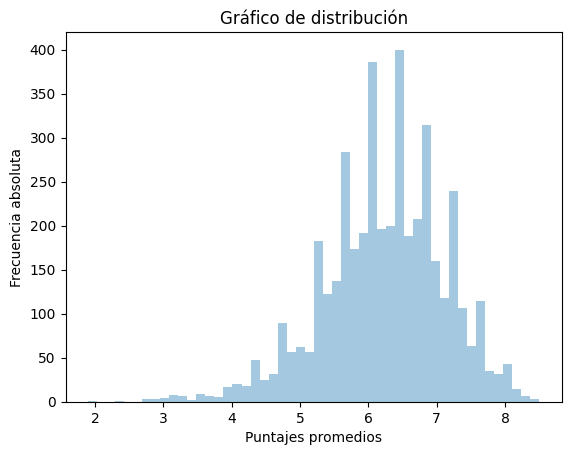

In [28]:
# Trazamos el histograma para mostrar la nueva distribución con los ajustes realizados a los datos atípicos
ax = sns.distplot( peliculas_mas_9votos_df.vote_average,
              kde = False,
              norm_hist= False
             )
ax.set(xlabel = "Puntajes promedios", ylabel = "Frecuencia absoluta")
ax.set_title("Gráfico de distribución")

Text(0.5, 1.0, 'Medidas de distribución del promedio de puntajes')

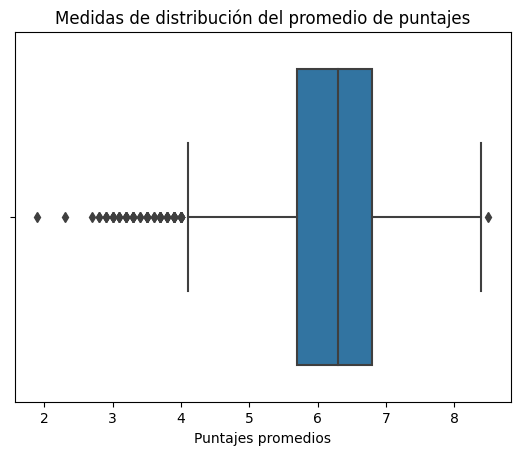

In [29]:
# Trazamos el diagrama de caja para mostrar las medidas de tendencia y de distribución con los ajustes
ax=sns.boxplot(x=peliculas_mas_9votos_df.vote_average)
ax.set(xlabel = "Puntajes promedios")
ax.set_title("Medidas de distribución del promedio de puntajes")

### 5. **Tratamiento de datos extremos y datos atípicos**

In [30]:
# Cargamos el dataset notas en un dataframe
ratings_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231028-1_tests_estadisticos_python/Dataset/ratings.csv'
notas_df = pd.read_csv(ratings_data_file_path)

In [31]:
notas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [32]:
# Creamos una serie a partir de los puntajes promedios por pelicula
puntaje_promedio_por_pelicula_se = notas_df.groupby("movieId").rating.mean()
puntaje_promedio_por_pelicula_se.head(5)

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

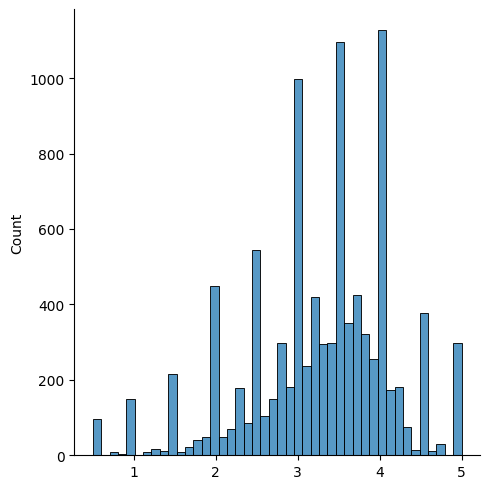

In [33]:
# ¿Como graficar el histograma (distribución de los datos) a partir de una serie?
# Respuesta: indicando la columna de valores de la serie con el parametro .values
# Ejemplo:
sns.displot(puntaje_promedio_por_pelicula_se.values)

In [34]:
frecuencia_votos_por_pelicula_df = notas_df.groupby("movieId").count()
frecuencia_votos_por_pelicula_df.head(5)

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


In [35]:
# ¿Cómo seleccionar los registros que cumplan una condición en una dataframe "A_df" y consultarlos en otro dataframe "B_df"?
# Respuesta: crear un objeto lista con los indices de los registros de dataframe "A_df" que cumplan la condición y filtrar
# en el dataframe "B_df" por esos indices.
indice_peliculas_mas_de_nueve_votos_ls = frecuencia_votos_por_pelicula_df.query("rating>9").index
puntaje_promedio_mas_de_nueve_se = puntaje_promedio_por_pelicula_se.loc[indice_peliculas_mas_de_nueve_votos_ls.values]
puntaje_promedio_mas_de_nueve_se.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

Text(0.5, 1.0, 'Gráfico de distribución del puntaje promedio por película')

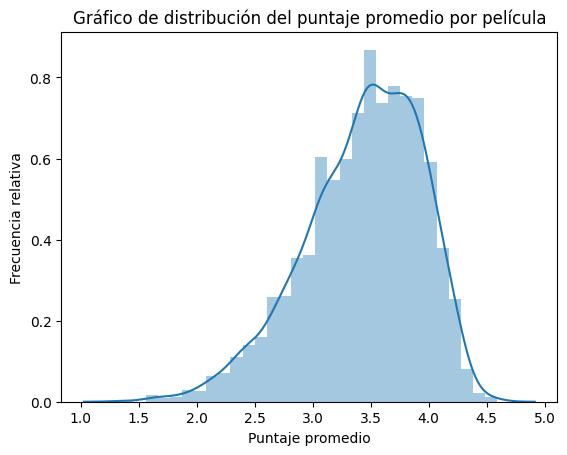

In [36]:
# Grafico de distribución de frecuencias relativas de los puntajes promedios por peliculas
ax = sns.distplot(puntaje_promedio_mas_de_nueve_se.values)
ax.set(xlabel="Puntaje promedio", ylabel="Frecuencia relativa")
ax.set_title("Gráfico de distribución del puntaje promedio por película")

Text(0.5, 1.0, 'Gráfico de distribución del puntaje promedio por película')

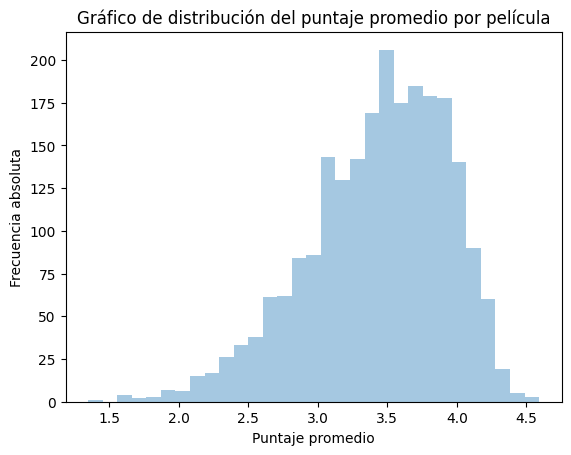

In [37]:
# Grafico de distribución de frecuencias absolutas de los puntajes promedios por peliculas
ax = sns.distplot(puntaje_promedio_mas_de_nueve_se.values,
                  kde= False,
                  norm_hist= False)
ax.set(xlabel="Puntaje promedio", ylabel="Frecuencia absoluta")
ax.set_title("Gráfico de distribución del puntaje promedio por película")

Text(0.5, 1.0, 'Medidas de distribución del puntaje promedio por película')

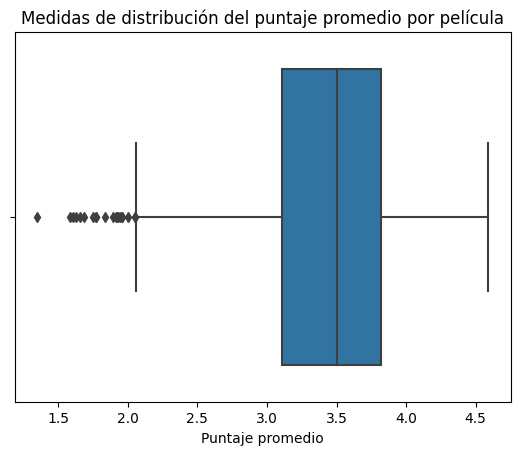

In [38]:
# Diagrama de caja de medidas de distribución de los puntajes promedios por peliculas
ax = sns.boxplot(x=puntaje_promedio_mas_de_nueve_se.values)
ax.set(xlabel="Puntaje promedio")
ax.set_title("Medidas de distribución del puntaje promedio por película")

### 6. **Visualizando la distribución acumulada**

Text(0.5, 1.0, 'Distribución acumulada del puntaje promedio por película en Ratings')

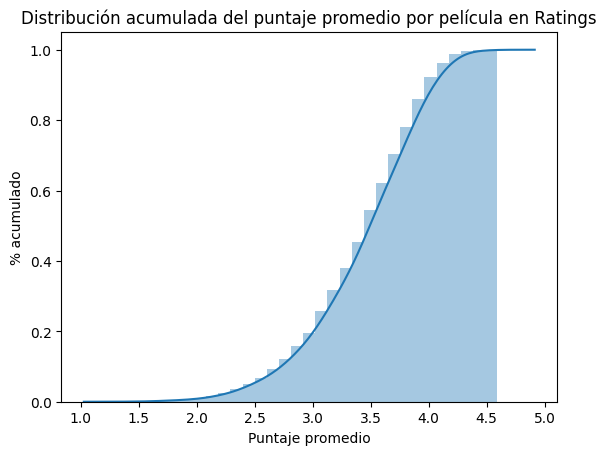

In [15]:
# ¿Cómo saber si la frecuencia de un valor de una variable cualitativa es "bueno" o "malo" en una distribución?
# Respuesta: Verificamos en que posición del gráfico de distribución acumulada cae el valor
# Grafico de distribución acumulada de los puntajes promedios por peliculas
ax = sns.distplot(puntaje_promedio_mas_de_nueve_se.values,
                  hist_kws={"cumulative": True},
                  kde_kws={"cumulative": True})
ax.set(xlabel="Puntaje promedio", ylabel="% acumulado")
ax.set_title("Distribución acumulada del puntaje promedio por película en Ratings")

Text(0.5, 1.0, 'Distribución acumulada por puntaje promedio por pelicula en TMDB')

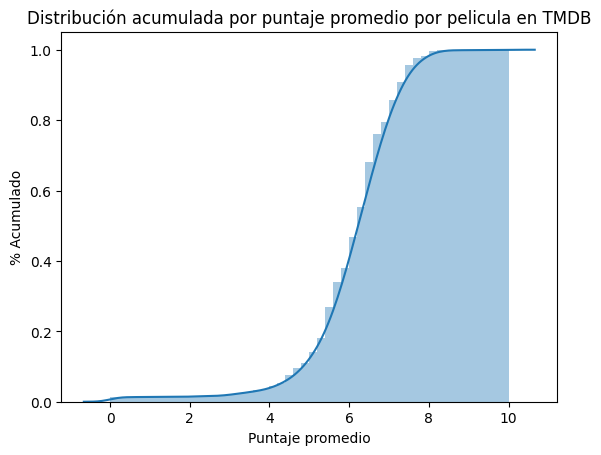

In [16]:
# Grafico de distribución acumulada de los puntajes promedios por peliculas
ax = sns.distplot(tmdb_df.vote_average,
                  hist_kws={"cumulative": True},
                  kde_kws={"cumulative": True})
ax.set(xlabel = "Puntaje promedio", ylabel = "% Acumulado")
ax.set_title("Distribución acumulada por puntaje promedio por pelicula en TMDB")

### **Otros analisis**

Text(0.5, 1.0, 'Gráfico de distribución de la cantidad de votos')

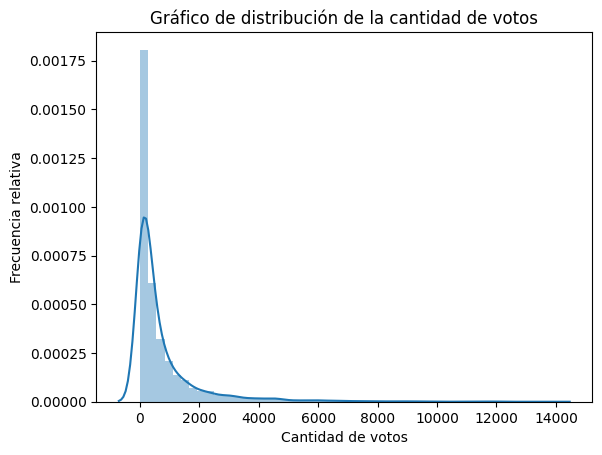

In [40]:
ax = sns.distplot(peliculas_mas_9votos_df.vote_count)
ax.set(xlabel = "Cantidad de votos", ylabel = "Frecuencia relativa")
ax.set_title("Gráfico de distribución de la cantidad de votos")